In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
X_train = []
Y_train = []
image_size = 150
classes = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for cl in classes:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',cl)
    for image in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,image))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(classes.index(cl))
        
for cl in classes:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',cl)
    for image in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,image))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(classes.index(cl))

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [3]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101, shuffle = True)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [7]:
hist = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


2023-06-26 16:11:45.588247: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 25s 129ms/step - loss: 2.3372 - accuracy: 0.2970 - val_loss: 1.3582 - val_accuracy: 0.3333
Epoch 2/20
83/83 [==============================] - 8s 96ms/step - loss: 1.3191 - accuracy: 0.3398 - val_loss: 1.4290 - val_accuracy: 0.2959
Epoch 3/20
83/83 [==============================] - 8s 99ms/step - loss: 1.1514 - accuracy: 0.5013 - val_loss: 1.2763 - val_accuracy: 0.4694
Epoch 4/20
83/83 [==============================] - 8s 101ms/step - loss: 0.9823 - accuracy: 0.5819 - val_loss: 1.1333 - val_accuracy: 0.5068
Epoch 5/20
83/83 [==============================] - 8s 100ms/step - loss: 0.8976 - accuracy: 0.6001 - val_loss: 1.0667 - val_accuracy: 0.5476
Epoch 6/20
83/83 [==============================] - 8s 97ms/step - loss: 0.7912 - accuracy: 0.6587 - val_loss: 0.8593 - val_accuracy: 0.6327
Epoch 7/20
83/83 [==============================] - 8s 98ms/step - loss: 0.7000 - accuracy: 0.7034 - val_loss: 0.8123 - val_accuracy: 0.6259
Epoch 8/20
83/83 [==

In [8]:
model.save("model.h5")

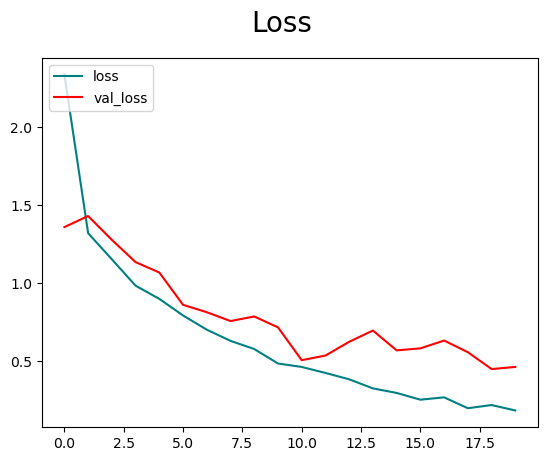

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

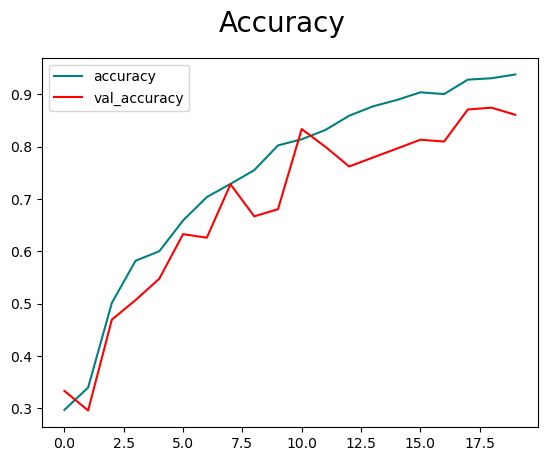

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [22]:
# y_pred_list = list of the labels from the test data
y_pred_list=[]
y_pred=model.predict(X_test)
for i in y_pred:
    y_pred_list.append(np.argmax(i))

11/11 [==============================] - 0s 23ms/step


In [29]:
# y_pred_list = list of the labels from the test data
y_true_list=[]

for i in y_true:
    y_true_list.append(np.argmax(i))


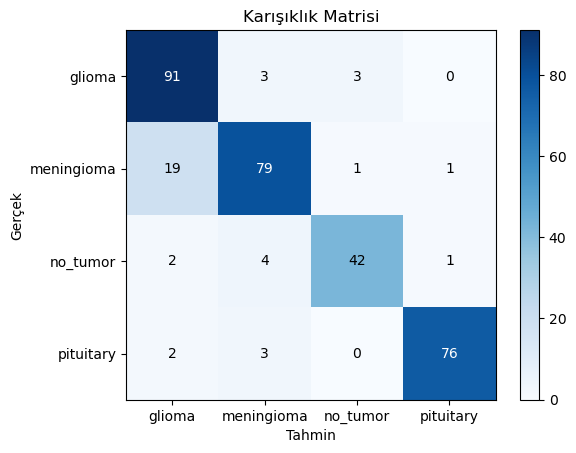

In [35]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = y_true_list  
y_pred = y_pred_list  

confusion = tf.math.confusion_matrix(y_true, y_pred, num_classes=4)


confusion_np = confusion.numpy()


plt.imshow(confusion_np, cmap='Blues')
plt.colorbar()

class_labels = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
num_classes = len(class_labels)
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

thresh = confusion_np.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(confusion_np[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if confusion_np[i, j] > thresh else "black")

plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')

plt.show()
